In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cardio_train.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(69301, 13)

In [7]:
df['cardio'].unique()

array([0, 1], dtype=int64)

In [8]:
df['age'] = df['age']/365

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [10]:
df.rename(columns={'ap_hi':'systolic','ap_lo':'diastolic','gluc':'glucose','alco':'alcohol','active':'physical activity','cardio':'cardiovascular disease'},inplace=True)

In [11]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,physical activity,cardiovascular disease
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [12]:
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,physical activity,cardiovascular disease
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [13]:
df.duplicated().sum()

24

In [14]:
df[df.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,physical activity,cardiovascular disease
9863,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21085,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
37806,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
39666,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
41751,50.282192,1,169,67.0,120,80,1,1,0,0,1,0
43954,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
44426,58.301370,1,165,65.0,120,80,1,1,0,0,1,0
45049,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45111,58.164384,1,164,62.0,120,80,1,1,0,0,1,0
48218,60.123288,1,165,60.0,120,80,1,1,0,0,1,0


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.count()

age                       69277
gender                    69277
height                    69277
weight                    69277
systolic                  69277
diastolic                 69277
cholesterol               69277
glucose                   69277
smoke                     69277
alcohol                   69277
physical activity         69277
cardiovascular disease    69277
dtype: int64

In [17]:
df.isnull().sum()

age                       0
gender                    0
height                    0
weight                    0
systolic                  0
diastolic                 0
cholesterol               0
glucose                   0
smoke                     0
alcohol                   0
physical activity         0
cardiovascular disease    0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

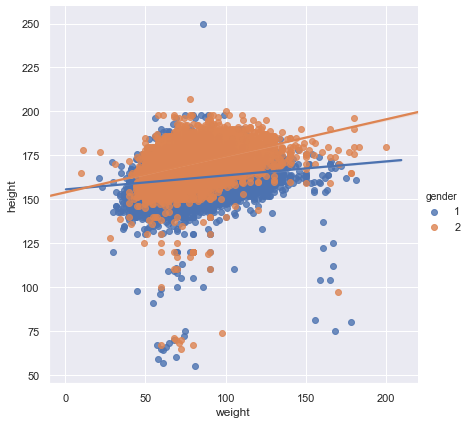

In [19]:
g = sns.lmplot(x="weight", y="height",data=df,hue = "gender", height= 6)

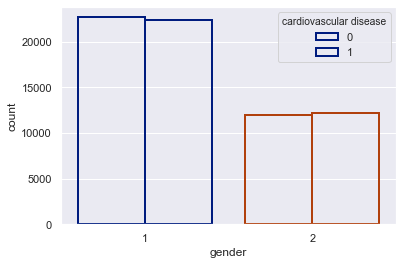

In [20]:
ax = sns.countplot(x ="gender", hue = "cardiovascular disease", data = df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=2,                
                   edgecolor = sns.color_palette("dark", 5))

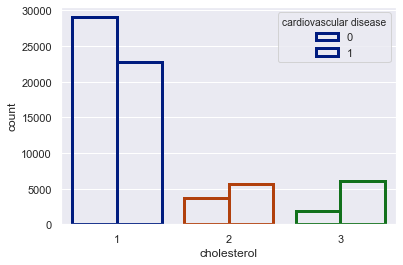

In [21]:
ax = sns.countplot(x ="cholesterol", hue = "cardiovascular disease", data = df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=3,                
                   edgecolor = sns.color_palette("dark", 5))

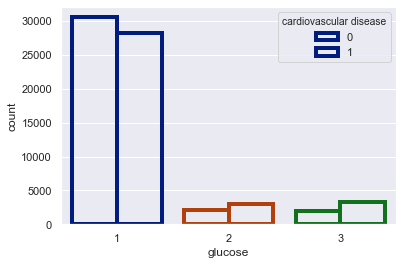

In [22]:
ax = sns.countplot(x ="glucose", hue = "cardiovascular disease", data = df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=4,                
                   edgecolor = sns.color_palette("dark", 5))

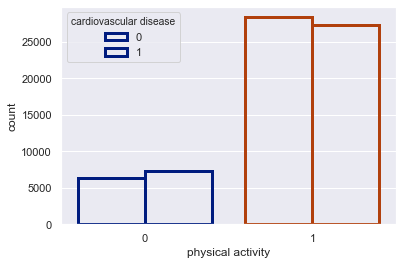

In [23]:
ax = sns.countplot(x ="physical activity", hue = "cardiovascular disease", data = df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=3,                
                   edgecolor = sns.color_palette("dark", 5))

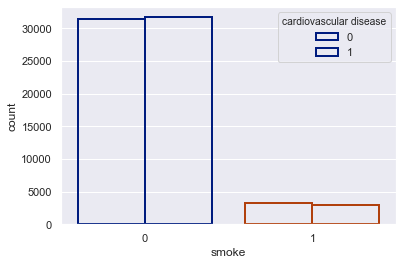

In [24]:
ax = sns.countplot(x ="smoke", hue = "cardiovascular disease", data = df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=2,                
                   edgecolor = sns.color_palette("dark", 5))

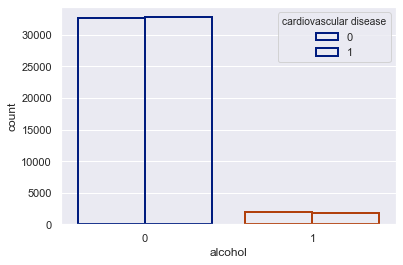

In [25]:
ax = sns.countplot(x ="alcohol", hue = "cardiovascular disease", data = df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=2,                
                   edgecolor = sns.color_palette("dark", 5))

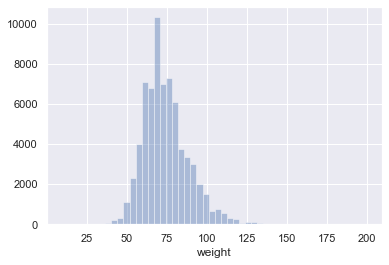

In [26]:
sns.distplot(df['weight'], kde = False)

In [27]:
df['weight'].sort_values().head()

57159    10.0
33118    11.0
59489    21.0
28789    22.0
26107    23.0
Name: weight, dtype: float64

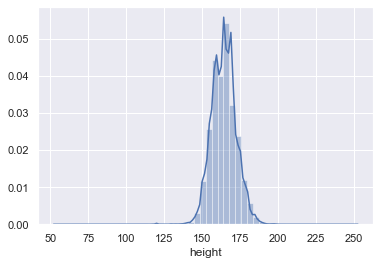

In [28]:
sns.distplot(df['height'], bins = 50, kde = True)

In [29]:
df['height'].sort_values().head()

22024    55
65944    57
63416    59
28458    60
26904    64
Name: height, dtype: int64

In [30]:
df['height'].max()

250

In [31]:
df['BMI'] = df['weight'] / df['height'] / df['height'] * 10000
df['pulse pressure'] = df['systolic'] - df['diastolic']

In [32]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,physical activity,cardiovascular disease,BMI,pulse pressure
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0,28.720083,50
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1,26.722873,40
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0,25.711662,40
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0,31.221304,40
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0,25.806452,40


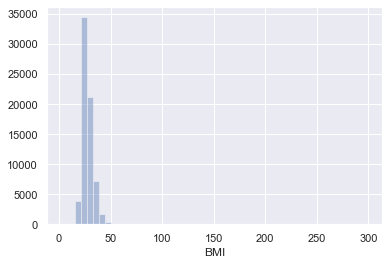

In [33]:
sns.distplot(df['BMI'], bins = 50, kde = False)

In [34]:
df[df['BMI']>100].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,physical activity,cardiovascular disease,BMI,pulse pressure
5454,57.506849,1,122,161.0,120,80,1,1,0,0,1,1,108.169847,40
6899,40.167123,2,70,72.0,120,8,1,1,0,0,1,0,146.938776,112
7472,48.345205,2,97,170.0,160,100,1,1,1,0,1,1,180.678074,60
12071,53.682192,1,75,168.0,120,80,1,1,1,0,1,1,298.666667,40
12566,61.523288,2,71,68.0,120,80,3,1,0,0,1,0,134.893870,40
13624,60.287671,1,67,57.0,120,90,1,1,0,0,1,1,126.977055,30
14468,43.320548,1,70,68.0,120,80,1,1,0,0,0,0,138.775510,40
14667,47.684932,1,125,167.0,180,90,1,2,0,0,1,1,106.880000,90
16000,53.917808,2,74,98.0,140,90,1,1,0,0,1,1,178.962747,50
19329,54.183562,1,112,167.0,180,120,1,1,0,1,1,0,133.131378,60


In [35]:
df[(df['pulse pressure']>=60) & (df['cholesterol']==3)].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,physical activity,cardiovascular disease,BMI,pulse pressure
14,55.663014,1,154,85.0,160,100,3,1,0,0,1,1,35.840783,60
46,57.597260,1,170,81.0,170,90,3,3,0,0,0,1,28.027682,80
57,61.484932,1,161,94.0,140,80,3,2,0,0,1,1,36.264033,60
63,52.610959,1,160,71.0,160,100,3,1,0,0,1,1,27.734375,60
76,54.104110,1,151,75.0,160,90,3,1,0,0,1,1,32.893294,70
103,42.282192,2,172,90.0,160,90,3,1,0,0,1,1,30.421850,70
121,59.772603,2,164,75.0,150,90,3,1,0,0,0,1,27.885187,60
126,43.772603,1,161,88.0,150,80,3,1,0,0,1,1,33.949308,70
128,63.334247,1,147,64.0,160,100,3,1,0,0,1,1,29.617289,60
151,63.435616,1,165,95.0,150,80,3,3,0,0,1,1,34.894399,70


In [36]:
from sklearn.model_selection import train_test_split
predictors = df.drop(['height','weight','cardiovascular disease'], axis=1)
target = df['cardiovascular disease']
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.3,random_state=0)

In [37]:
len(X_train)

48493

In [38]:
len(Y_train)

48493

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
Y_pred_rfc = rfc.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(Y_test, Y_pred_rfc))

[[7461 2989]
 [3157 7177]]


In [42]:
print(classification_report(Y_test, Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71     10450
           1       0.71      0.69      0.70     10334

    accuracy                           0.70     20784
   macro avg       0.70      0.70      0.70     20784
weighted avg       0.70      0.70      0.70     20784



In [43]:
rfc.score(X_test, Y_test)

0.7042917628945342

In [44]:
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(estimator=rfc, X=X_train, y=Y_train, cv=10)

In [45]:
score_rfc

array([0.70768914, 0.70680412, 0.70303155, 0.70818726, 0.70200041,
       0.70983708, 0.70406269, 0.69395752, 0.71973603, 0.70179418])

In [46]:
score_rfc.mean()

0.7057099983007582

In [47]:
score_rfc.std()

0.006341264358846938

In [48]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
Y_pred_svc = svc.predict(X_test)

In [50]:
print(confusion_matrix(Y_test, Y_pred_svc))

[[7896 2554]
 [3107 7227]]


In [51]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10450
           1       0.74      0.70      0.72     10334

    accuracy                           0.73     20784
   macro avg       0.73      0.73      0.73     20784
weighted avg       0.73      0.73      0.73     20784



In [52]:
svc.score(X_test, Y_test)

0.7276270207852193

In [53]:
score_svc = cross_val_score(estimator=svc, X=X_train, y=Y_train, cv=10, n_jobs=4)

In [54]:
score_svc

array([0.7280973 , 0.72536082, 0.72592287, 0.72716024, 0.71787998,
       0.73045989, 0.72386059, 0.70983708, 0.73953392, 0.72056094])

In [55]:
score_svc.mean()

0.7248673632620376

In [56]:
score_svc.std()

0.007468089516854743

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [58]:
Y_pred_knn = knn.predict(X_test)

In [59]:
print(confusion_matrix(Y_test, Y_pred_knn))

[[8220 2230]
 [3422 6912]]


In [60]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74     10450
           1       0.76      0.67      0.71     10334

    accuracy                           0.73     20784
   macro avg       0.73      0.73      0.73     20784
weighted avg       0.73      0.73      0.73     20784



In [61]:
knn.score(X_test, Y_test)

0.7280600461893765

In [62]:
score_knn = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)

In [63]:
score_knn

array([0.72686044, 0.72536082, 0.72901629, 0.72509796, 0.7180862 ,
       0.72592287, 0.72282945, 0.71045576, 0.73561559, 0.72489173])

In [64]:
score_knn.mean()

0.7244137124828411

In [65]:
score_knn.std()

0.006276106732472425

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
Y_pred_nb = nb.predict(X_test)

In [68]:
print(confusion_matrix(Y_test, Y_pred_nb))
print(classification_report(Y_test, Y_pred_nb))

[[9614  836]
 [8008 2326]]
              precision    recall  f1-score   support

           0       0.55      0.92      0.68     10450
           1       0.74      0.23      0.34     10334

    accuracy                           0.57     20784
   macro avg       0.64      0.57      0.51     20784
weighted avg       0.64      0.57      0.52     20784



In [69]:
nb.score(X_test, Y_test)

0.5744803695150116

In [70]:
score_nb = cross_val_score(estimator=nb, X=X_train, y=Y_train, cv=10)

In [71]:
score_nb

array([0.56524428, 0.56721649, 0.57764488, 0.58259435, 0.57290163,
       0.57826356, 0.57681996, 0.57310786, 0.56980821, 0.56403382])

In [72]:
score_nb.mean()

0.5727635037109938

In [73]:
score_nb.std()

0.005827225864997893

In [74]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
Y_pred_xgb = xgb.predict(X_test)

In [76]:
print(confusion_matrix(Y_test, Y_pred_xgb))
print(classification_report(Y_test, Y_pred_xgb))

[[8160 2290]
 [3099 7235]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10450
           1       0.76      0.70      0.73     10334

    accuracy                           0.74     20784
   macro avg       0.74      0.74      0.74     20784
weighted avg       0.74      0.74      0.74     20784



In [77]:
xgb.score(X_test, Y_test)

0.7407140107775212

In [78]:
score_xgb = cross_val_score(estimator=xgb, X=X_train, y=Y_train, cv=10)

In [79]:
score_xgb

array([0.73696145, 0.73195876, 0.73664673, 0.73850278, 0.73499691,
       0.74077129, 0.73499691, 0.72179831, 0.74551454, 0.72654155])

In [80]:
score_xgb.mean()

0.7348689238674906

In [81]:
score_xgb.std()

0.006462191108072473

In [82]:
model = ['Random Forest','SVM','KNN','Naive Bayes','XGBoost']
scores = [score_rfc.mean(),score_svc.mean(),score_knn.mean(),score_nb.mean(),score_xgb.mean()]
summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy
XGBoost,0.734869
SVM,0.724867
KNN,0.724414
Random Forest,0.705710
Naive Bayes,0.572764
